# Explore factors affecting income in NLSY '79 data

## Author:Doug Perez

### December 7, 2017

#### Many factors effect a person's income over a period of years. In this analysis, we sought to investigate whether race plays a significant role in determining an individual's income.  Further, we investigated the data over time to find any trends that may have developed over the past three decades.  The income data has been standardized to 2014 dollars, making these comparisons both possible and valid.

In [2]:

#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [3]:
# load income data 

income_data = pd.read_csv('./data/income_data_nlsy79.csv',usecols=['CASEID','income','year'])

income_data.head()

,CASEID,income,year
0,1,NaN,1982
1,2,10000.0,1982
2,3,7000.0,1982
3,4,1086.0,1982
4,5,2300.0,1982


In [4]:
# load physical data
physical_data = pd.read_csv('./data/physical_data_nlsy79.csv',usecols=['CASEID','weight','year','eyes','hair','race','sex','height','BMI'])


physical_data.head()

,CASEID,weight,year,eyes,hair,race,sex,height,BMI
0,1,NaN,1981,NaN,NaN,NBNH,female,65.0,NaN
1,2,120.0,1981,hazel,light brown,NBNH,female,62.0,21.948431
2,3,NaN,1981,blue,blond,NBNH,female,NaN,NaN
3,4,110.0,1981,blue,light brown,NBNH,female,67.0,17.228549
4,5,130.0,1981,NaN,NaN,NBNH,male,63.0,23.028617


### Next, we set up the conversion table to standardize the income values.  This will be used later in the analysis.

In [5]:
income_converter = {'year': [1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014], 
                    'multiplier': [2.42, 2.34, 2.24, 2.17, 2.13, 2.05, 1.97, 1.88, 1.78, 1.71, 1.66, 1.61, 1.57, 1.49, 1.44, 1.36, 1.31, 1.24, 1.17, 1.10, 1.08, 1.03, 1]}
income_df = pd.DataFrame(data=income_converter)
income_df.set_index('year', inplace=True)

In [6]:
income_df

,multiplier
year,
1982,2.42
1983,2.34
1984,2.24
1985,2.17
1986,2.13
1987,2.05
1988,1.97
1989,1.88
1990,1.78


In [7]:
#merge data frames
merged_data= pd.merge(income_data,physical_data,left_on=['CASEID','year'],right_on=['CASEID','year'],how='inner')

merged_data.head()

,CASEID,income,year,weight,eyes,hair,race,sex,height,BMI
0,1,NaN,1982,NaN,NaN,NaN,NBNH,female,NaN,NaN
1,2,10000.0,1982,125.0,hazel,light brown,NBNH,female,62.0,22.862949
2,3,7000.0,1982,160.0,blue,blond,NBNH,female,70.0,22.957760
3,4,1086.0,1982,109.0,blue,light brown,NBNH,female,67.0,17.071925
4,5,2300.0,1982,135.0,NaN,NaN,NBNH,male,63.0,23.914334


In [8]:
# Add income multiplier and true_income to merged_data
merged_data_income_standard = pd.merge(merged_data, income_df, left_on=['year'], right_index=True, how='inner')
merged_data_income_standard['true_income'] = merged_data_income_standard['income']*merged_data_income_standard['multiplier']

# Analysis of Race vs. Income

Next, we turn our attention to the physical characteristic of race, investigating what effect, if any, it may have on an individual's income.

## Preparation of the data

The income multipliers loaded earlier are multiplied by the raw income data to produce a "true_income" value that adjusts for inflation and other economic conditions, allowing that the data may be compared from year to year. Although this was done previously, we remind the reader and re-check the data here to ensure consistency.

In [17]:
merged_data

,CASEID,income,year,weight,eyes,hair,race,sex,height,BMI
0,1,NaN,1982,NaN,NaN,NaN,NBNH,female,NaN,NaN
1,2,10000.0,1982,125.0,hazel,light brown,NBNH,female,62.0,22.862949
2,3,7000.0,1982,160.0,blue,blond,NBNH,female,70.0,22.957760
3,4,1086.0,1982,109.0,blue,light brown,NBNH,female,67.0,17.071925
4,5,2300.0,1982,135.0,NaN,NaN,NBNH,male,63.0,23.914334
5,6,3250.0,1982,200.0,brown,brown,NBNH,male,65.0,33.281960
6,7,4975.0,1982,138.0,brown,brown,NBNH,male,67.0,21.613997
7,8,7500.0,1982,169.0,hazel,brown,NBNH,female,65.0,28.123256
8,9,5000.0,1982,155.0,hazel,brown,NBNH,male,65.0,25.793519
9,10,9000.0,1982,115.0,hazel,brown,NBNH,female,66.0,18.561607


In [18]:
# Restrict the data to the columns we're interested in only.
income_race_all = merged_data[['CASEID','income','race','year']]

In [19]:
income_race_all

,CASEID,income,race,year
0,1,NaN,NBNH,1982
1,2,10000.0,NBNH,1982
2,3,7000.0,NBNH,1982
3,4,1086.0,NBNH,1982
4,5,2300.0,NBNH,1982
5,6,3250.0,NBNH,1982
6,7,4975.0,NBNH,1982
7,8,7500.0,NBNH,1982
8,9,5000.0,NBNH,1982
9,10,9000.0,NBNH,1982


In [20]:
# Convert to dataframe and add the income_df to compute true income.
income_race_all = pd.DataFrame(data=income_race_all)

income_race_all = pd.merge(income_race_all, income_df, left_on='year',right_index=True)

In [21]:
income_race_all

,CASEID,income,race,year,multiplier
0,1,NaN,NBNH,1982,2.42
1,2,10000.0,NBNH,1982,2.42
2,3,7000.0,NBNH,1982,2.42
3,4,1086.0,NBNH,1982,2.42
4,5,2300.0,NBNH,1982,2.42
5,6,3250.0,NBNH,1982,2.42
6,7,4975.0,NBNH,1982,2.42
7,8,7500.0,NBNH,1982,2.42
8,9,5000.0,NBNH,1982,2.42
9,10,9000.0,NBNH,1982,2.42


In [22]:
# Convert income to a standard amount for comparison.  Convert all values to 2014 dollars.
income_race_all['true_income'] = income_race_all['income'] * income_race_all['multiplier']

In [23]:
income_race_all

,CASEID,income,race,year,multiplier,true_income
0,1,NaN,NBNH,1982,2.42,NaN
1,2,10000.0,NBNH,1982,2.42,24200.00
2,3,7000.0,NBNH,1982,2.42,16940.00
3,4,1086.0,NBNH,1982,2.42,2628.12
4,5,2300.0,NBNH,1982,2.42,5566.00
5,6,3250.0,NBNH,1982,2.42,7865.00
6,7,4975.0,NBNH,1982,2.42,12039.50
7,8,7500.0,NBNH,1982,2.42,18150.00
8,9,5000.0,NBNH,1982,2.42,12100.00
9,10,9000.0,NBNH,1982,2.42,21780.00


## Examination of the race variable

In [24]:
income_race_all['race'].unique()

array(['NBNH', 'hispanic', 'black'], dtype=object)

Three values are listed for race, "black", "hispanic", and "NBNH" (Neither Black Nor Hispanic).  As we will see, the third category contains more records than both of the other categories combined.

In [25]:
# Prepare race data for histogram

from collections import Counter
race_counts = Counter(income_race_all['race'])
race_counts = pd.DataFrame.from_dict(race_counts, orient='index')
race_counts


,0
NBNH,142690
hispanic,38038
black,60306


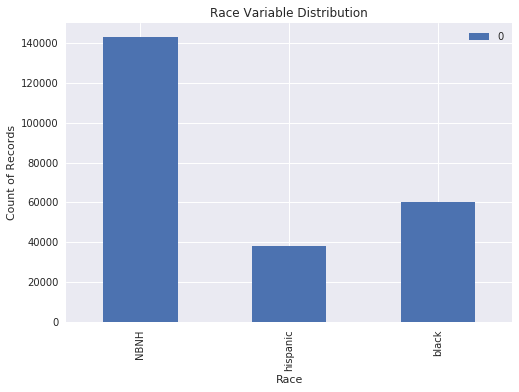

In [26]:
# Check sample size
axes = race_counts.plot(kind='bar')
axes.set_title('Race Variable Distribution')
axes.set_xlabel('Race')
axes.set_ylabel('Count of Records')

This trend holds true for individual years as well, as seen in 1982, 1998, and 2014 below.

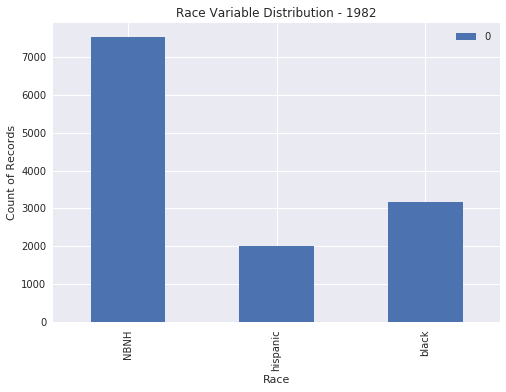

In [27]:
# 1982

income_race_1982 = income_race_all[
    income_race_all['year'] == 1982]

race_counts_1982 = Counter(income_race_1982['race'])
race_counts_1982 = pd.DataFrame.from_dict(race_counts_1982, orient='index')
race_counts_1982

axes = race_counts_1982.plot(kind='bar')
axes.set_title('Race Variable Distribution - 1982')
axes.set_xlabel('Race')
axes.set_ylabel('Count of Records')


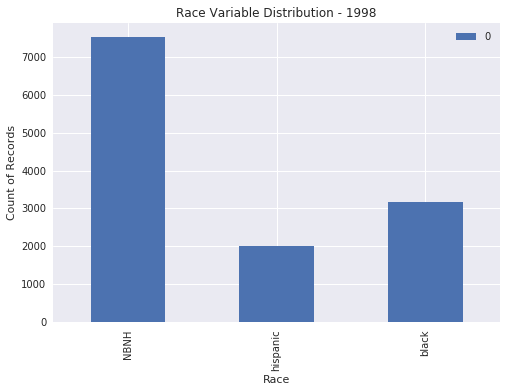

In [28]:
# 1998

income_race_1998 = income_race_all[
    income_race_all['year'] == 1998]

race_counts_1998 = Counter(income_race_1998['race'])
race_counts_1998 = pd.DataFrame.from_dict(race_counts_1998, orient='index')
race_counts_1998

axes = race_counts_1998.plot(kind='bar')
axes.set_title('Race Variable Distribution - 1998')
axes.set_xlabel('Race')
axes.set_ylabel('Count of Records')


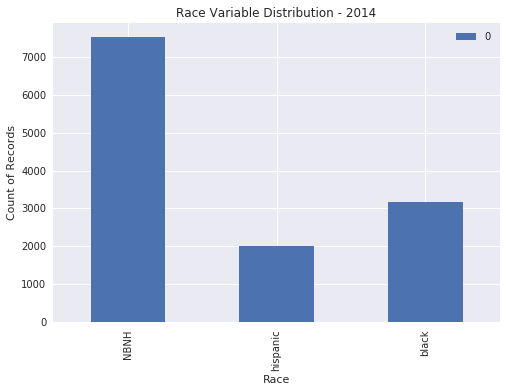

In [29]:
# 2014

income_race_2014 = income_race_all[
    income_race_all['year'] == 2014]

race_counts_2014 = Counter(income_race_2014['race'])
race_counts_2014 = pd.DataFrame.from_dict(race_counts_2014, orient='index')
race_counts_2014

axes = race_counts_2014.plot(kind='bar')
axes.set_title('Race Variable Distribution - 2014')
axes.set_xlabel('Race')
axes.set_ylabel('Count of Records')


Fortunately, the overall sample size of each individual year and the large sample across all years still allows for meaningful analysis of the black and hispanic race variables.

## Examination of income variable

In [30]:
income_counts = Counter(income_race_all['true_income'].sort_values(ascending=False).unique())
income_counts = pd.DataFrame.from_dict(income_counts, orient='index')
income_counts

,0
370314.00,1
354144.90,1
338605.30,1
337309.92,1
329756.92,1
327384.72,1
309160.00,1
294032.00,1
213076.80,1
206774.75,1


### High income values

A quick glance at the income data reveals several peak outliers.  These are likely the truncation values discussed in the introduction, but we will examine further to determine whether or not they are valid for this analysis.


We start by looking at all values above $200,000 and getting a count of unique values to see if we can isolate the truncation numbers.  

In [31]:
high_income = income_race_all[income_race_all['income'] > 200000]
high_income['income'].unique()

array([ 216200.,  236000.,  265933.,  279816.,  307823.,  312324.,
        343830.,  370314.])

Number of records where income = 265933

In [32]:
len(income_race_all[income_race_all['income'] == 265933])

133

Number of records where income = 279816

In [33]:
len(income_race_all[income_race_all['income'] == 279816])

144

Number of records where income = 307823

In [34]:
len(income_race_all[income_race_all['income'] == 307823])

146

Number of records where income = 312324

In [35]:
len(income_race_all[income_race_all['income'] == 312324])

140

Number of records where income = 343830

In [36]:
len(income_race_all[income_race_all['income'] == 343830])

143

Number of records where income = 370314

In [37]:
len(income_race_all[income_race_all['income'] == 370314])

144

265933 279816 307823 312324 343830 370314 appear to be truncated income values.  They are at the top of the scale and between 133 and 146 individuals have the exact same unique income.  That's an awfully specific number for so many people to have it.

Looking at the people with incomes below $200,000, the numbers appear much tidier, mostly ending in round hundreds or thousands, but nearly all ending in zeros.

It seems reasonable to exclude these values at the upper end for analysis, given their innacurate nature due to truncation.


In [38]:
# Collect income values we intend to keep in low_income
low_income = income_race_all[income_race_all['income'] <= 200000]
first_income = income_race_all[income_race_all['income'] == 216200]
second_income = income_race_all[income_race_all['income'] == 236000]
low_income = pd.concat([low_income, first_income, second_income])
low_income

,CASEID,income,race,year,multiplier,true_income
1,2,10000.0,NBNH,1982,2.42,24200.00
2,3,7000.0,NBNH,1982,2.42,16940.00
3,4,1086.0,NBNH,1982,2.42,2628.12
4,5,2300.0,NBNH,1982,2.42,5566.00
5,6,3250.0,NBNH,1982,2.42,7865.00
6,7,4975.0,NBNH,1982,2.42,12039.50
7,8,7500.0,NBNH,1982,2.42,18150.00
8,9,5000.0,NBNH,1982,2.42,12100.00
9,10,9000.0,NBNH,1982,2.42,21780.00
10,11,4002.0,NBNH,1982,2.42,9684.84


(array([  6.32120000e+04,   3.42380000e+04,   2.78860000e+04,
          1.68040000e+04,   8.83500000e+03,   4.62000000e+03,
          2.20500000e+03,   1.56500000e+03,   9.41000000e+02,
          6.19000000e+02,   6.16000000e+02,   1.13000000e+02,
          3.00000000e+00,   2.87000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.77000000e+02]),
 array([      0.,   15458.,   30916.,   46374.,   61832.,   77290.,
          92748.,  108206.,  123664.,  139122.,  154580.,  170038.,
         185496.,  200954.,  216412.,  231870.,  247328.,  262786.,
         278244.,  293702.,  309160.]),
 <a list of 20 Patch objects>)

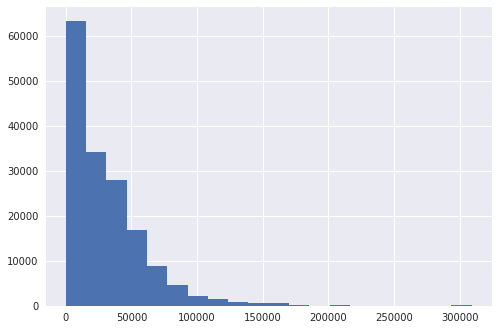

In [39]:
#View the new income data 

figure, axes = plt.subplots()
axes.hist(
    low_income['true_income'], 
    bins=20)

### Zero income values

Next, we look at the peak at $0 income.

In [40]:
income_race_all[income_race_all['income'] == 0]

,CASEID,income,race,year,multiplier,true_income
14,15,0.0,NBNH,1982,2.42,0.0
30,31,0.0,hispanic,1982,2.42,0.0
34,35,0.0,NBNH,1982,2.42,0.0
39,40,0.0,NBNH,1982,2.42,0.0
85,86,0.0,black,1982,2.42,0.0
86,87,0.0,black,1982,2.42,0.0
90,91,0.0,NBNH,1982,2.42,0.0
97,98,0.0,NBNH,1982,2.42,0.0
112,113,0.0,NBNH,1982,2.42,0.0
126,127,0.0,NBNH,1982,2.42,0.0


31,558 records with 0 for income.  These could be due to stay-at-home mothers, individuals in school, unemployment factors unrelated to race, or any other number of possibilities.  Some of these factors were explored in the gender analysis.  For the purposes of the race analysis, we will exclude the $0 income records.


In [41]:
# For now, considering only those records with an income > 0

low_income = low_income[low_income['true_income'] > 0]
low_income

,CASEID,income,race,year,multiplier,true_income
1,2,10000.0,NBNH,1982,2.42,24200.00
2,3,7000.0,NBNH,1982,2.42,16940.00
3,4,1086.0,NBNH,1982,2.42,2628.12
4,5,2300.0,NBNH,1982,2.42,5566.00
5,6,3250.0,NBNH,1982,2.42,7865.00
6,7,4975.0,NBNH,1982,2.42,12039.50
7,8,7500.0,NBNH,1982,2.42,18150.00
8,9,5000.0,NBNH,1982,2.42,12100.00
9,10,9000.0,NBNH,1982,2.42,21780.00
10,11,4002.0,NBNH,1982,2.42,9684.84


(array([  3.16540000e+04,   3.42380000e+04,   2.78860000e+04,
          1.68040000e+04,   8.84800000e+03,   4.60700000e+03,
          2.20500000e+03,   1.56500000e+03,   9.41000000e+02,
          6.21000000e+02,   6.14000000e+02,   1.13000000e+02,
          3.00000000e+00,   2.87000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.77000000e+02]),
 array([  1.00000000e+00,   1.54589500e+04,   3.09169000e+04,
          4.63748500e+04,   6.18328000e+04,   7.72907500e+04,
          9.27487000e+04,   1.08206650e+05,   1.23664600e+05,
          1.39122550e+05,   1.54580500e+05,   1.70038450e+05,
          1.85496400e+05,   2.00954350e+05,   2.16412300e+05,
          2.31870250e+05,   2.47328200e+05,   2.62786150e+05,
          2.78244100e+05,   2.93702050e+05,   3.09160000e+05]),
 <a list of 20 Patch objects>)

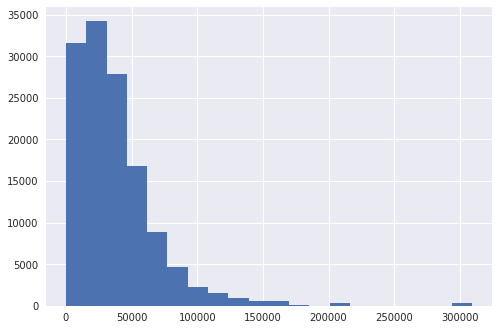

In [42]:
#Plot the remaining income data for fit and to view trends.

figure, axes = plt.subplots()
axes.hist(
    low_income['true_income'], 
    bins=20)

We see a clearly left-skewed distribution forming as the data is transformed.

### Final validity check

In [43]:
# No NaN race values
sum(low_income['race'].isnull())

0

In [44]:
# No Nan income values
sum(low_income['income'].isnull())

0

We see no NaN values for race or income, so we are prepared to move ahead with the analysis.

## Analysis of Mean and Median incomes by race

In [45]:
# Prepare true_income data for black race only
race_black = low_income[low_income['race'] == 'black']
race_black
race_black = race_black[['CASEID','true_income']]
race_black.set_index('CASEID')

,true_income
CASEID,
83,10890.00
84,1132.56
85,1694.00
88,42350.00
89,6050.00
291,1210.00
306,8470.00
333,31944.00
335,7260.00


In [46]:
# Prepare true_income data for hispanic race only
race_hispanic = low_income[low_income['race'] == 'hispanic']
race_hispanic
race_hispanic = race_hispanic[['CASEID','true_income']]
race_hispanic.set_index('CASEID')

,true_income
CASEID,
32,26620.00
53,2165.90
174,18084.66
203,26620.00
205,7260.00
225,7777.88
226,580.80
228,7260.00
283,7690.76


In [47]:
# Prepare true_income data for NBNH race only
race_NBNH = low_income[low_income['race'] == 'NBNH']
race_NBNH
race_NBNH = race_NBNH[['CASEID','true_income']]
race_NBNH.set_index('CASEID')

,true_income
CASEID,
2,24200.00
3,16940.00
4,2628.12
5,5566.00
6,7865.00
7,12039.50
8,18150.00
9,12100.00
10,21780.00


(0, 300000)

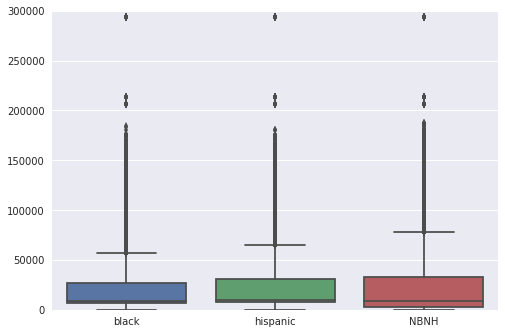

In [48]:
# Put the income data by race on a box plot to look for trends

plot_data = [race_black, race_hispanic, race_NBNH]

figure, axes = plt.subplots()


import seaborn as sns
sns.set_style("whitegrid")
axes = sns.boxplot(data=plot_data)
axes.set_xticklabels(['black', 'hispanic', 'NBNH'])
plt.ylim(0,300000)


The boxplot above clearly illustrates that the median incomes for black and hispanic individuals are lower than those for other races, and that the spread of incomes generally trends higher for hispanics than blacks, and for other groups more than the two minorities broken out in this data.

Here are the overall mean and median values:


Mean Income Black:

In [49]:
race_black['true_income'].mean()

31496.168620956862

Mean Income Hispanic:

In [50]:
race_hispanic['true_income'].mean()

36070.811008269447

Mean Income NBNH:

In [51]:
race_NBNH['true_income'].mean()

40295.223452797451

Median Income Black:

In [52]:
race_black['true_income'].median()

26560.0

Median Income Hispanic:

In [53]:
race_hispanic['true_income'].median()

30498.75

Median Income NBNH:

In [54]:
race_NBNH['true_income'].median()

32970.0

Mean - Median Income Black:

In [55]:
race_black['true_income'].mean() - race_black['true_income'].median()

4936.1686209568616

Mean - Median Income Hispanic:

In [56]:
race_hispanic['true_income'].mean() - race_hispanic['true_income'].median()

5572.0610082694475

Mean - Median Income NBNH:

In [57]:
race_NBNH['true_income'].mean() - race_NBNH['true_income'].median()

7325.2234527974506

Mean - Median proportion of mean black:

In [58]:
(race_black['true_income'].mean() - race_black['true_income'].median())/race_black['true_income'].mean()

0.15672282811162128

Mean - Median proportion of mean hispanic:

In [59]:
(race_hispanic['true_income'].mean() - race_hispanic['true_income'].median())/race_hispanic['true_income'].mean()

0.15447562315668531

Mean - Median proportion of mean NBNH:

In [60]:
(race_NBNH['true_income'].mean() - race_NBNH['true_income'].median())/race_NBNH['true_income'].mean()

0.18178887781521672

## Income spreads by race

Next, let's analyze the income spreads by race.

(array([  9930.,  10308.,   7133.,   3882.,   1837.,    847.,    356.,
           214.,    114.,     71.,     77.,     16.,      0.,     27.,
             0.,      0.,      0.,      0.,      0.,     31.]),
 array([  1.10000000e+00,   1.54590450e+04,   3.09169900e+04,
          4.63749350e+04,   6.18328800e+04,   7.72908250e+04,
          9.27487700e+04,   1.08206715e+05,   1.23664660e+05,
          1.39122605e+05,   1.54580550e+05,   1.70038495e+05,
          1.85496440e+05,   2.00954385e+05,   2.16412330e+05,
          2.31870275e+05,   2.47328220e+05,   2.62786165e+05,
          2.78244110e+05,   2.93702055e+05,   3.09160000e+05]),
 <a list of 20 Patch objects>)

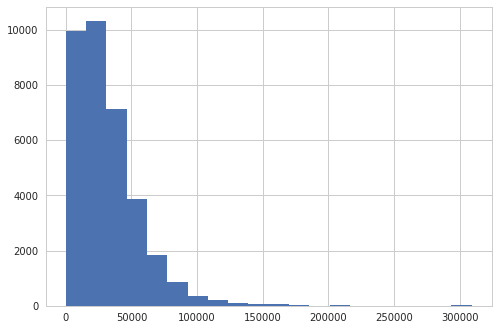

In [61]:
#Plot the income data for black race

figure, axes = plt.subplots()
axes.hist(
    race_black['true_income'], 
    bins=20)

(array([ 5440.,  6266.,  5357.,  2923.,  1497.,   754.,   384.,   237.,
          126.,    82.,    74.,    16.,     0.,    29.,     0.,     0.,
            0.,     0.,     0.,    33.]),
 array([  1.36000000e+00,   1.54592920e+04,   3.09172240e+04,
          4.63751560e+04,   6.18330880e+04,   7.72910200e+04,
          9.27489520e+04,   1.08206884e+05,   1.23664816e+05,
          1.39122748e+05,   1.54580680e+05,   1.70038612e+05,
          1.85496544e+05,   2.00954476e+05,   2.16412408e+05,
          2.31870340e+05,   2.47328272e+05,   2.62786204e+05,
          2.78244136e+05,   2.93702068e+05,   3.09160000e+05]),
 <a list of 20 Patch objects>)

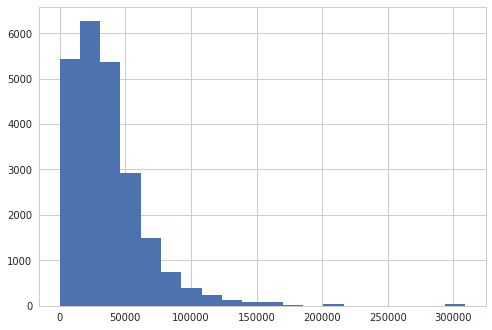

In [62]:
#Plot the income data for hispanic race

figure, axes = plt.subplots()
axes.hist(
    race_hispanic['true_income'], 
    bins=20)

(array([  1.62840000e+04,   1.76640000e+04,   1.53960000e+04,
          9.99900000e+03,   5.51400000e+03,   3.00600000e+03,
          1.46500000e+03,   1.11400000e+03,   7.01000000e+02,
          4.68000000e+02,   4.63000000e+02,   8.10000000e+01,
          3.00000000e+00,   2.31000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.13000000e+02]),
 array([  1.00000000e+00,   1.54589500e+04,   3.09169000e+04,
          4.63748500e+04,   6.18328000e+04,   7.72907500e+04,
          9.27487000e+04,   1.08206650e+05,   1.23664600e+05,
          1.39122550e+05,   1.54580500e+05,   1.70038450e+05,
          1.85496400e+05,   2.00954350e+05,   2.16412300e+05,
          2.31870250e+05,   2.47328200e+05,   2.62786150e+05,
          2.78244100e+05,   2.93702050e+05,   3.09160000e+05]),
 <a list of 20 Patch objects>)

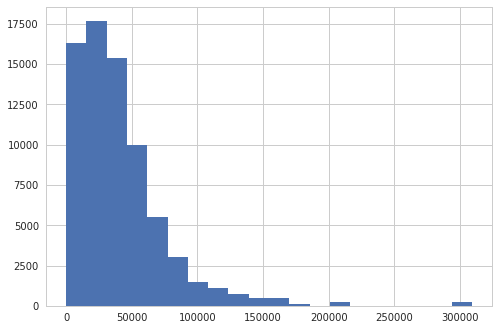

In [63]:
#Plot the income data for NBNH race

figure, axes = plt.subplots()
axes.hist(
    race_NBNH['true_income'], 
    bins=20)

The histogram above shows how the cluster of incomes is skewed further to the right (lower income) for both the black and hispanic subgroups, with black incomes clustering even lower.

Let's break this down into individual years and see if there are any changes.

### Income spreads by race, 1982


In [64]:
data_1982 = low_income[low_income['year'] == 1982]
black_1982 = data_1982[data_1982['race'] == 'black']
black_1982 = black_1982[['CASEID','true_income']]
black_1982.set_index('CASEID')

,true_income
CASEID,
83,10890.00
84,1132.56
85,1694.00
88,42350.00
89,6050.00
291,1210.00
306,8470.00
333,31944.00
335,7260.00


In [65]:
hispanic_1982 = data_1982[data_1982['race'] == 'hispanic']
hispanic_1982 = hispanic_1982[['CASEID','true_income']]
hispanic_1982.set_index('CASEID')

,true_income
CASEID,
32,26620.00
53,2165.90
174,18084.66
203,26620.00
205,7260.00
225,7777.88
226,580.80
228,7260.00
283,7690.76


In [66]:
NBNH_1982 = data_1982[data_1982['race'] == 'NBNH']
NBNH_1982 = NBNH_1982[['CASEID','true_income']]
NBNH_1982.set_index('CASEID')

,true_income
CASEID,
2,24200.00
3,16940.00
4,2628.12
5,5566.00
6,7865.00
7,12039.50
8,18150.00
9,12100.00
10,21780.00


(array([ 571.,  258.,  245.,  127.,  142.,  121.,  119.,   58.,   69.,
          29.,   24.,   26.,   20.,   16.,    6.,    0.,    0.,    0.,
           0.,   28.]),
 array([  5.56600000e+01,   3.55885200e+03,   7.06204400e+03,
          1.05652360e+04,   1.40684280e+04,   1.75716200e+04,
          2.10748120e+04,   2.45780040e+04,   2.80811960e+04,
          3.15843880e+04,   3.50875800e+04,   3.85907720e+04,
          4.20939640e+04,   4.55971560e+04,   4.91003480e+04,
          5.26035400e+04,   5.61067320e+04,   5.96099240e+04,
          6.31131160e+04,   6.66163080e+04,   7.01195000e+04]),
 <a list of 20 Patch objects>)

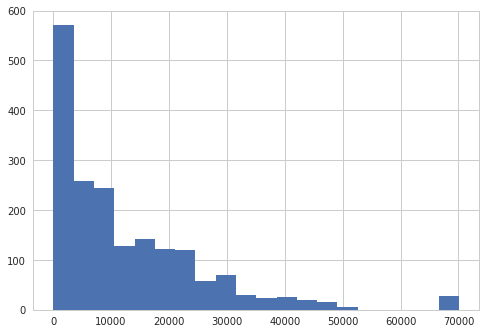

In [67]:
#Plot the 1982 income data for black race

figure, axes = plt.subplots()
axes.hist(
    black_1982['true_income'], 
    bins=20)

(array([ 258.,  179.,  169.,  107.,  135.,   88.,  107.,   57.,   68.,
          25.,   37.,   31.,   13.,   10.,    8.,    0.,    0.,    0.,
           0.,   24.]),
 array([  3.63000000e+01,   3.54046000e+03,   7.04462000e+03,
          1.05487800e+04,   1.40529400e+04,   1.75571000e+04,
          2.10612600e+04,   2.45654200e+04,   2.80695800e+04,
          3.15737400e+04,   3.50779000e+04,   3.85820600e+04,
          4.20862200e+04,   4.55903800e+04,   4.90945400e+04,
          5.25987000e+04,   5.61028600e+04,   5.96070200e+04,
          6.31111800e+04,   6.66153400e+04,   7.01195000e+04]),
 <a list of 20 Patch objects>)

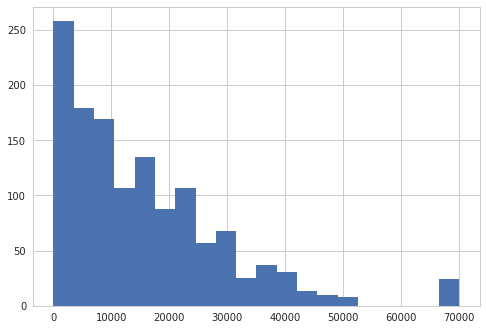

In [68]:
#Plot the 1982 income data for hispanic race

figure, axes = plt.subplots()
axes.hist(
    hispanic_1982['true_income'], 
    bins=20)

(array([ 1020.,   778.,   672.,   414.,   497.,   368.,   475.,   220.,
          302.,   124.,   109.,   115.,    74.,    58.,    29.,     3.,
            0.,     0.,     0.,   135.]),
 array([  1.21000000e+01,   3.51747000e+03,   7.02284000e+03,
          1.05282100e+04,   1.40335800e+04,   1.75389500e+04,
          2.10443200e+04,   2.45496900e+04,   2.80550600e+04,
          3.15604300e+04,   3.50658000e+04,   3.85711700e+04,
          4.20765400e+04,   4.55819100e+04,   4.90872800e+04,
          5.25926500e+04,   5.60980200e+04,   5.96033900e+04,
          6.31087600e+04,   6.66141300e+04,   7.01195000e+04]),
 <a list of 20 Patch objects>)

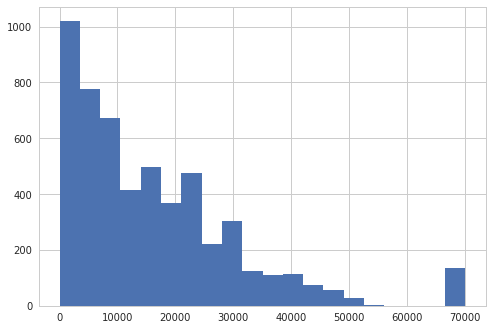

In [69]:
#Plot the 1982 income data for NBNH race

figure, axes = plt.subplots()
axes.hist(
    NBNH_1982['true_income'], 
    bins=20)

The right-skew of the NBNH group is much clearer in 1982 than for the whole population.  Next, we examine 1998, chosen after the enacting of NAFTA to see if there is any different trend.

### Income spreads by race, 1998

In [70]:
data_1998 = low_income[low_income['year'] == 1998]
black_1998 = data_1998[data_1998['race'] == 'black']
black_1998 = black_1998[['CASEID','true_income']]
black_1998.set_index('CASEID')

,true_income
CASEID,
86,14400.00
87,25920.00
88,33984.00
89,53280.00
221,21600.00
223,64800.00
224,12960.00
291,864.00
306,33120.00


In [71]:
hispanic_1998 = data_1998[data_1998['race'] == 'hispanic']
hispanic_1998 = hispanic_1998[['CASEID','true_income']]
hispanic_1998.set_index('CASEID')

,true_income
CASEID,
31,53280.0
174,58802.4
283,67824.0
284,76320.0
285,36000.0
286,40320.0
290,10080.0
298,40320.0
301,36000.0


In [72]:
NBNH_1998 = data_1998[data_1998['race'] == 'NBNH']
NBNH_1998 = NBNH_1998[['CASEID','true_income']]
NBNH_1998.set_index('CASEID')

,true_income
CASEID,
3,1008.00
4,18720.00
7,38592.00
8,31680.00
11,36000.00
13,59904.00
14,43200.00
16,31680.00
17,25200.00


(array([ 244.,  304.,  412.,  278.,  255.,  134.,   70.,   45.,   33.,
          10.,   17.,    6.,    4.,    2.,    0.,    0.,    0.,    0.,
           0.,    9.]),
 array([  1.58400000e+01,   1.06688880e+04,   2.13219360e+04,
          3.19749840e+04,   4.26280320e+04,   5.32810800e+04,
          6.39341280e+04,   7.45871760e+04,   8.52402240e+04,
          9.58932720e+04,   1.06546320e+05,   1.17199368e+05,
          1.27852416e+05,   1.38505464e+05,   1.49158512e+05,
          1.59811560e+05,   1.70464608e+05,   1.81117656e+05,
          1.91770704e+05,   2.02423752e+05,   2.13076800e+05]),
 <a list of 20 Patch objects>)

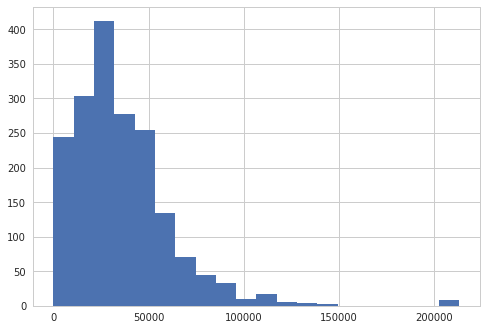

In [73]:
#Plot the 1998 income data for black race

figure, axes = plt.subplots()
axes.hist(
    black_1998['true_income'], 
    bins=20)

(array([ 137.,  164.,  230.,  219.,  162.,  110.,   82.,   44.,   24.,
          22.,   11.,    4.,    2.,    0.,    0.,    0.,    0.,    0.,
           0.,   19.]),
 array([  8.64000000e+01,   1.07359200e+04,   2.13854400e+04,
          3.20349600e+04,   4.26844800e+04,   5.33340000e+04,
          6.39835200e+04,   7.46330400e+04,   8.52825600e+04,
          9.59320800e+04,   1.06581600e+05,   1.17231120e+05,
          1.27880640e+05,   1.38530160e+05,   1.49179680e+05,
          1.59829200e+05,   1.70478720e+05,   1.81128240e+05,
          1.91777760e+05,   2.02427280e+05,   2.13076800e+05]),
 <a list of 20 Patch objects>)

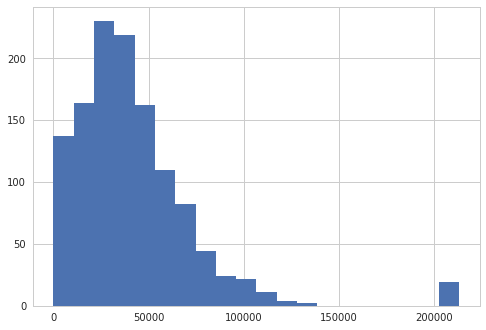

In [74]:
#Plot the 1998 income data for hispanic race

figure, axes = plt.subplots()
axes.hist(
    hispanic_1998['true_income'], 
    bins=20)

(array([ 353.,  414.,  559.,  490.,  543.,  305.,  231.,  179.,  127.,
          65.,   56.,   28.,   43.,   10.,    0.,    0.,    0.,    0.,
           0.,  113.]),
 array([  3.16800000e+01,   1.06839360e+04,   2.13361920e+04,
          3.19884480e+04,   4.26407040e+04,   5.32929600e+04,
          6.39452160e+04,   7.45974720e+04,   8.52497280e+04,
          9.59019840e+04,   1.06554240e+05,   1.17206496e+05,
          1.27858752e+05,   1.38511008e+05,   1.49163264e+05,
          1.59815520e+05,   1.70467776e+05,   1.81120032e+05,
          1.91772288e+05,   2.02424544e+05,   2.13076800e+05]),
 <a list of 20 Patch objects>)

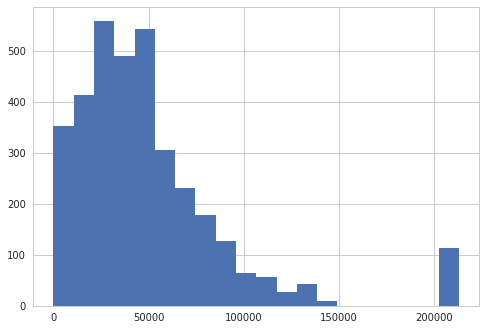

In [75]:
#Plot the 1998 income data for NBNH race

figure, axes = plt.subplots()
axes.hist(
    NBNH_1998['true_income'], 
    bins=20)

The hispanic spread has clearly shifted to the left.  As NAFTA allowed for a more free exchange of goods from Mexico, it is reasonable that the incomes of hispanic people may have seen an increase.  This will be a hypothesis for further investigation.

Finally, we examine the last year of the data, 2014.

### Income spreads by race, 2014

In [76]:
data_2014 = low_income[low_income['year'] == 2014]
black_2014 = data_2014[data_2014['race'] == 'black']
black_2014 = black_2014[['CASEID','true_income']]
black_2014.set_index('CASEID')

,true_income
CASEID,
86,24000.0
88,36000.0
168,14000.0
221,2100.0
223,61000.0
224,14000.0
227,30000.0
291,130.0
306,33000.0


In [77]:
hispanic_2014 = data_2014[data_2014['race'] == 'hispanic']
hispanic_2014 = hispanic_2014[['CASEID','true_income']]
hispanic_2014.set_index('CASEID')

,true_income
CASEID,
31,26000.0
174,55000.0
283,82000.0
284,148000.0
285,80000.0
286,70000.0
290,1002.0
301,60000.0
303,36400.0


In [78]:
NBNH_2014 = data_2014[data_2014['race'] == 'NBNH']
NBNH_2014 = NBNH_2014[['CASEID','true_income']]
NBNH_2014.set_index('CASEID')

,true_income
CASEID,
2,21000.0
3,40000.0
6,112000.0
8,47000.0
9,80000.0
14,45000.0
16,74000.0
17,68000.0
18,151000.0


(array([ 144.,  192.,  211.,  189.,  171.,  123.,   75.,   75.,   60.,
          37.,   27.,   23.,   11.,   11.,    4.,    5.,    9.,    3.,
           0.,    5.]),
 array([  5.00000000e+01,   9.24750000e+03,   1.84450000e+04,
          2.76425000e+04,   3.68400000e+04,   4.60375000e+04,
          5.52350000e+04,   6.44325000e+04,   7.36300000e+04,
          8.28275000e+04,   9.20250000e+04,   1.01222500e+05,
          1.10420000e+05,   1.19617500e+05,   1.28815000e+05,
          1.38012500e+05,   1.47210000e+05,   1.56407500e+05,
          1.65605000e+05,   1.74802500e+05,   1.84000000e+05]),
 <a list of 20 Patch objects>)

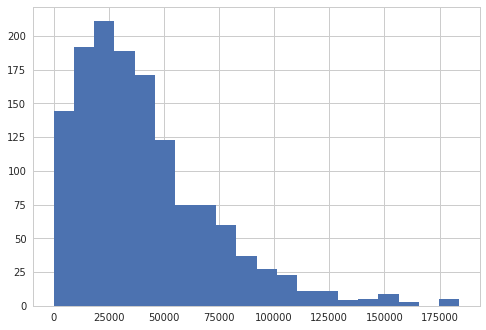

In [79]:
#Plot the 2014 income data for black race

figure, axes = plt.subplots()
axes.hist(
    black_2014['true_income'], 
    bins=20)

(array([  84.,  101.,  122.,  117.,  103.,   86.,   72.,   57.,   44.,
          29.,   10.,   17.,   15.,   16.,   11.,    3.,    6.,    4.,
           2.,    4.]),
 array([  2.90000000e+01,   9.02755000e+03,   1.80261000e+04,
          2.70246500e+04,   3.60232000e+04,   4.50217500e+04,
          5.40203000e+04,   6.30188500e+04,   7.20174000e+04,
          8.10159500e+04,   9.00145000e+04,   9.90130500e+04,
          1.08011600e+05,   1.17010150e+05,   1.26008700e+05,
          1.35007250e+05,   1.44005800e+05,   1.53004350e+05,
          1.62002900e+05,   1.71001450e+05,   1.80000000e+05]),
 <a list of 20 Patch objects>)

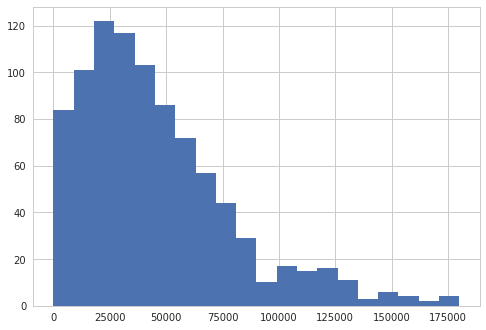

In [80]:
#Plot the 2014 income data for hispanic race

figure, axes = plt.subplots()
axes.hist(
    hispanic_2014['true_income'], 
    bins=20)

(array([ 161.,  227.,  289.,  317.,  281.,  253.,  233.,  127.,  144.,
         107.,   81.,   78.,   50.,   47.,   32.,    9.,   32.,   15.,
          11.,   18.]),
 array([  1.00000000e+00,   9.35095000e+03,   1.87009000e+04,
          2.80508500e+04,   3.74008000e+04,   4.67507500e+04,
          5.61007000e+04,   6.54506500e+04,   7.48006000e+04,
          8.41505500e+04,   9.35005000e+04,   1.02850450e+05,
          1.12200400e+05,   1.21550350e+05,   1.30900300e+05,
          1.40250250e+05,   1.49600200e+05,   1.58950150e+05,
          1.68300100e+05,   1.77650050e+05,   1.87000000e+05]),
 <a list of 20 Patch objects>)

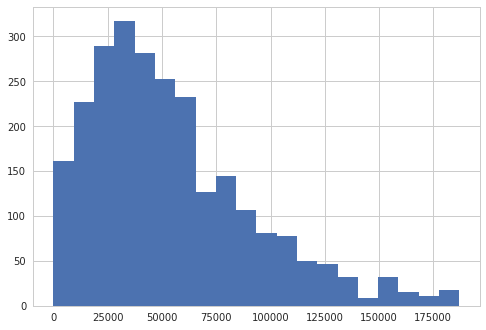

In [81]:
#Plot the 2014 income data for NBNH race

figure, axes = plt.subplots()
axes.hist(
    NBNH_2014['true_income'], 
    bins=20)

The histograms above show a pronounced leftward shift in the incomes of those individuals listed as black, as compared to the data in 1998 or 1982.  However, we also see more outlying peaks in the upper end of the income scale.  It could be that a few black high-earners are pulling the mean data up disproportionately compared to the hispanic or NBNH race groups.

# Conclusion and Hypotheses


## Hypotheses to consider for further analysis (Race vs Income)

1) The proportion of high earners is greater for NBNH than for either group, and for hispanics greater than blacks.  Do a few very-high earners skew the numbers disproportionately in both minority groups, but particularly the black group, making the mean values appear more equal than truly represented in the population?

2) Does the hypothesis about NAFTA increasing incomes for hispanic individuals hold?  A further analysis of the pre- and post-NAFTA years is required to fully answer this question, but we expect that mean and median incomes increase for the hispanic population as a result of NAFTA, and that this increase comes as the black population declines or grows more slowly.

3) The NBNH group seems to quietly outpace the two minority groups throughout the study.  We hypothesize that the gap between NBNH and the black and hispanic groups combined has grown over the course of the study.
